**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

**3**

- 3.1

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, '$n=10, p=0.5$')

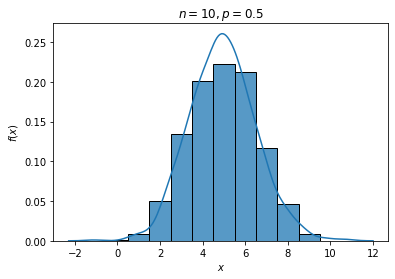

In [38]:
n = 10
p = 0.5
fig, ax = plt.subplots()
X = np.random.binomial(n=n, p=p, size=1000)
Z = np.random.normal(n*p, scale=np.sqrt(n*p*(1-p)), size=1000)
sns.histplot(data=X, stat='density', discrete=True, ax=ax)
sns.kdeplot(Z, ax=ax)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("$n=10, p=0.5$")

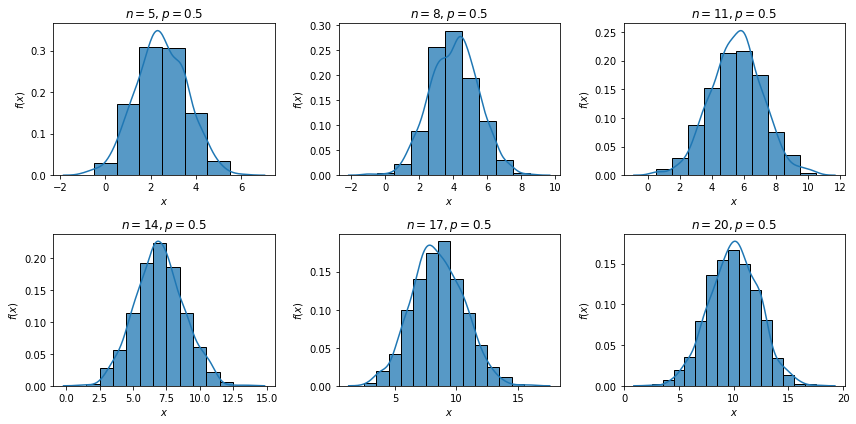

In [51]:
Ns = [5, 8, 11, 14, 17, 20]
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,6))
p=0.5
ix = 0
for i in range(2):
    for j in range(3):
        n = Ns[ix]
        X = np.random.binomial(n=n, p=p, size=1000)
        Z = np.random.normal(n*p, scale=np.sqrt(n*p*(1-p)), size=1000)
        sns.histplot(data=X, stat='density', discrete=True, ax=ax[i][j])
        sns.kdeplot(Z, ax=ax[i][j])
        ax[i][j].set_ylabel("$f(x)$")
        ax[i][j].set_xlabel("$x$")
        ax[i][j].set_title("$n={}".format(n))
        ix+=1
plt.tight_layout()

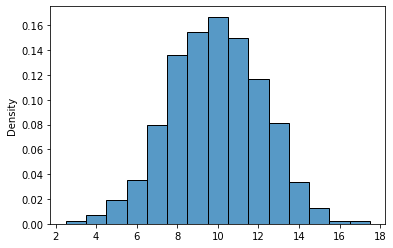

In [60]:
sns.histplot(data=X, stat='density', discrete=True)

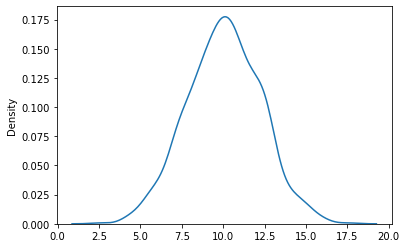

In [90]:
Akde = sns.kdeplot(Z)

In [91]:
PATCHES = A.patches
kdePATCHES = Akde.patches

In [92]:
H = [h.get_height() for h in PATCHES]
Hkde = [h.get_height() for h in kdePATCHES]

In [106]:
data = Akde.lines[0].get_data()

In [113]:
len(H)

15

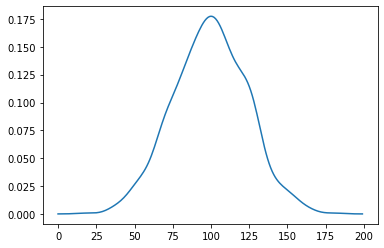

In [112]:
plt.plot(data[1])

5. Gere uma variável aleatória 𝑋 com distribuição normal padronizada contendo 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
mu=0
sigma=1
X = np.random.normal(mu, sigma, 1000)

- 5.1. Faça um histograma de 𝑋 e sobre ele plote a pdf N(0,1)

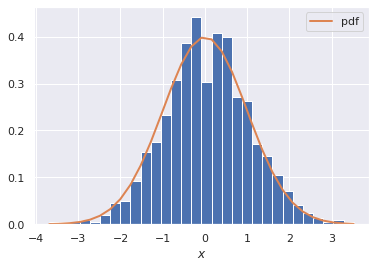

In [4]:
fig, ax = plt.subplots()
count, bins, _ = ax.hist(X, bins=30, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)),linewidth=2, label='pdf')
plt.legend()
plt.xlabel("$x$")
plt.show()

- 5.2 Faça um histograma de e sobre ele plote a pdf

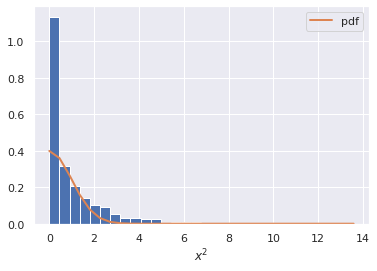

In [5]:
Y = X**2
fig, ax = plt.subplots()
count, bins, _ = ax.hist(Y, bins=30, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)),linewidth=2, label='pdf')
plt.legend()
plt.xlabel("$x^2$")
plt.show()